In [1]:
#Importing all the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.



In [2]:
#importing the data
day = pd.read_csv('/Users/santoshku/Documents/upGrad_PG/Linear_regression/Assignment/day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking for null values
day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values in the data, so no need to drop/impute values to any rows.

In [5]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
day.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Dropping variables
- Since day,date,month, year are represented by other columns, dteday can be Dropped.
- Instant column is just the count of entries, it can also be dropped.
- Removing weekday since the data is already present with holiday, workday status

In [7]:
day = day.drop(['dteday','instant','weekday'],axis = 1)

In [8]:
#checking the statistical data
day.describe()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 - Data has both categorical and continuous coloumns with various ranges, hence data scaling will be needed after test, train split.
 - Encoding will not be required, since the data is already encoded.


<Figure size 3240x3600 with 0 Axes>

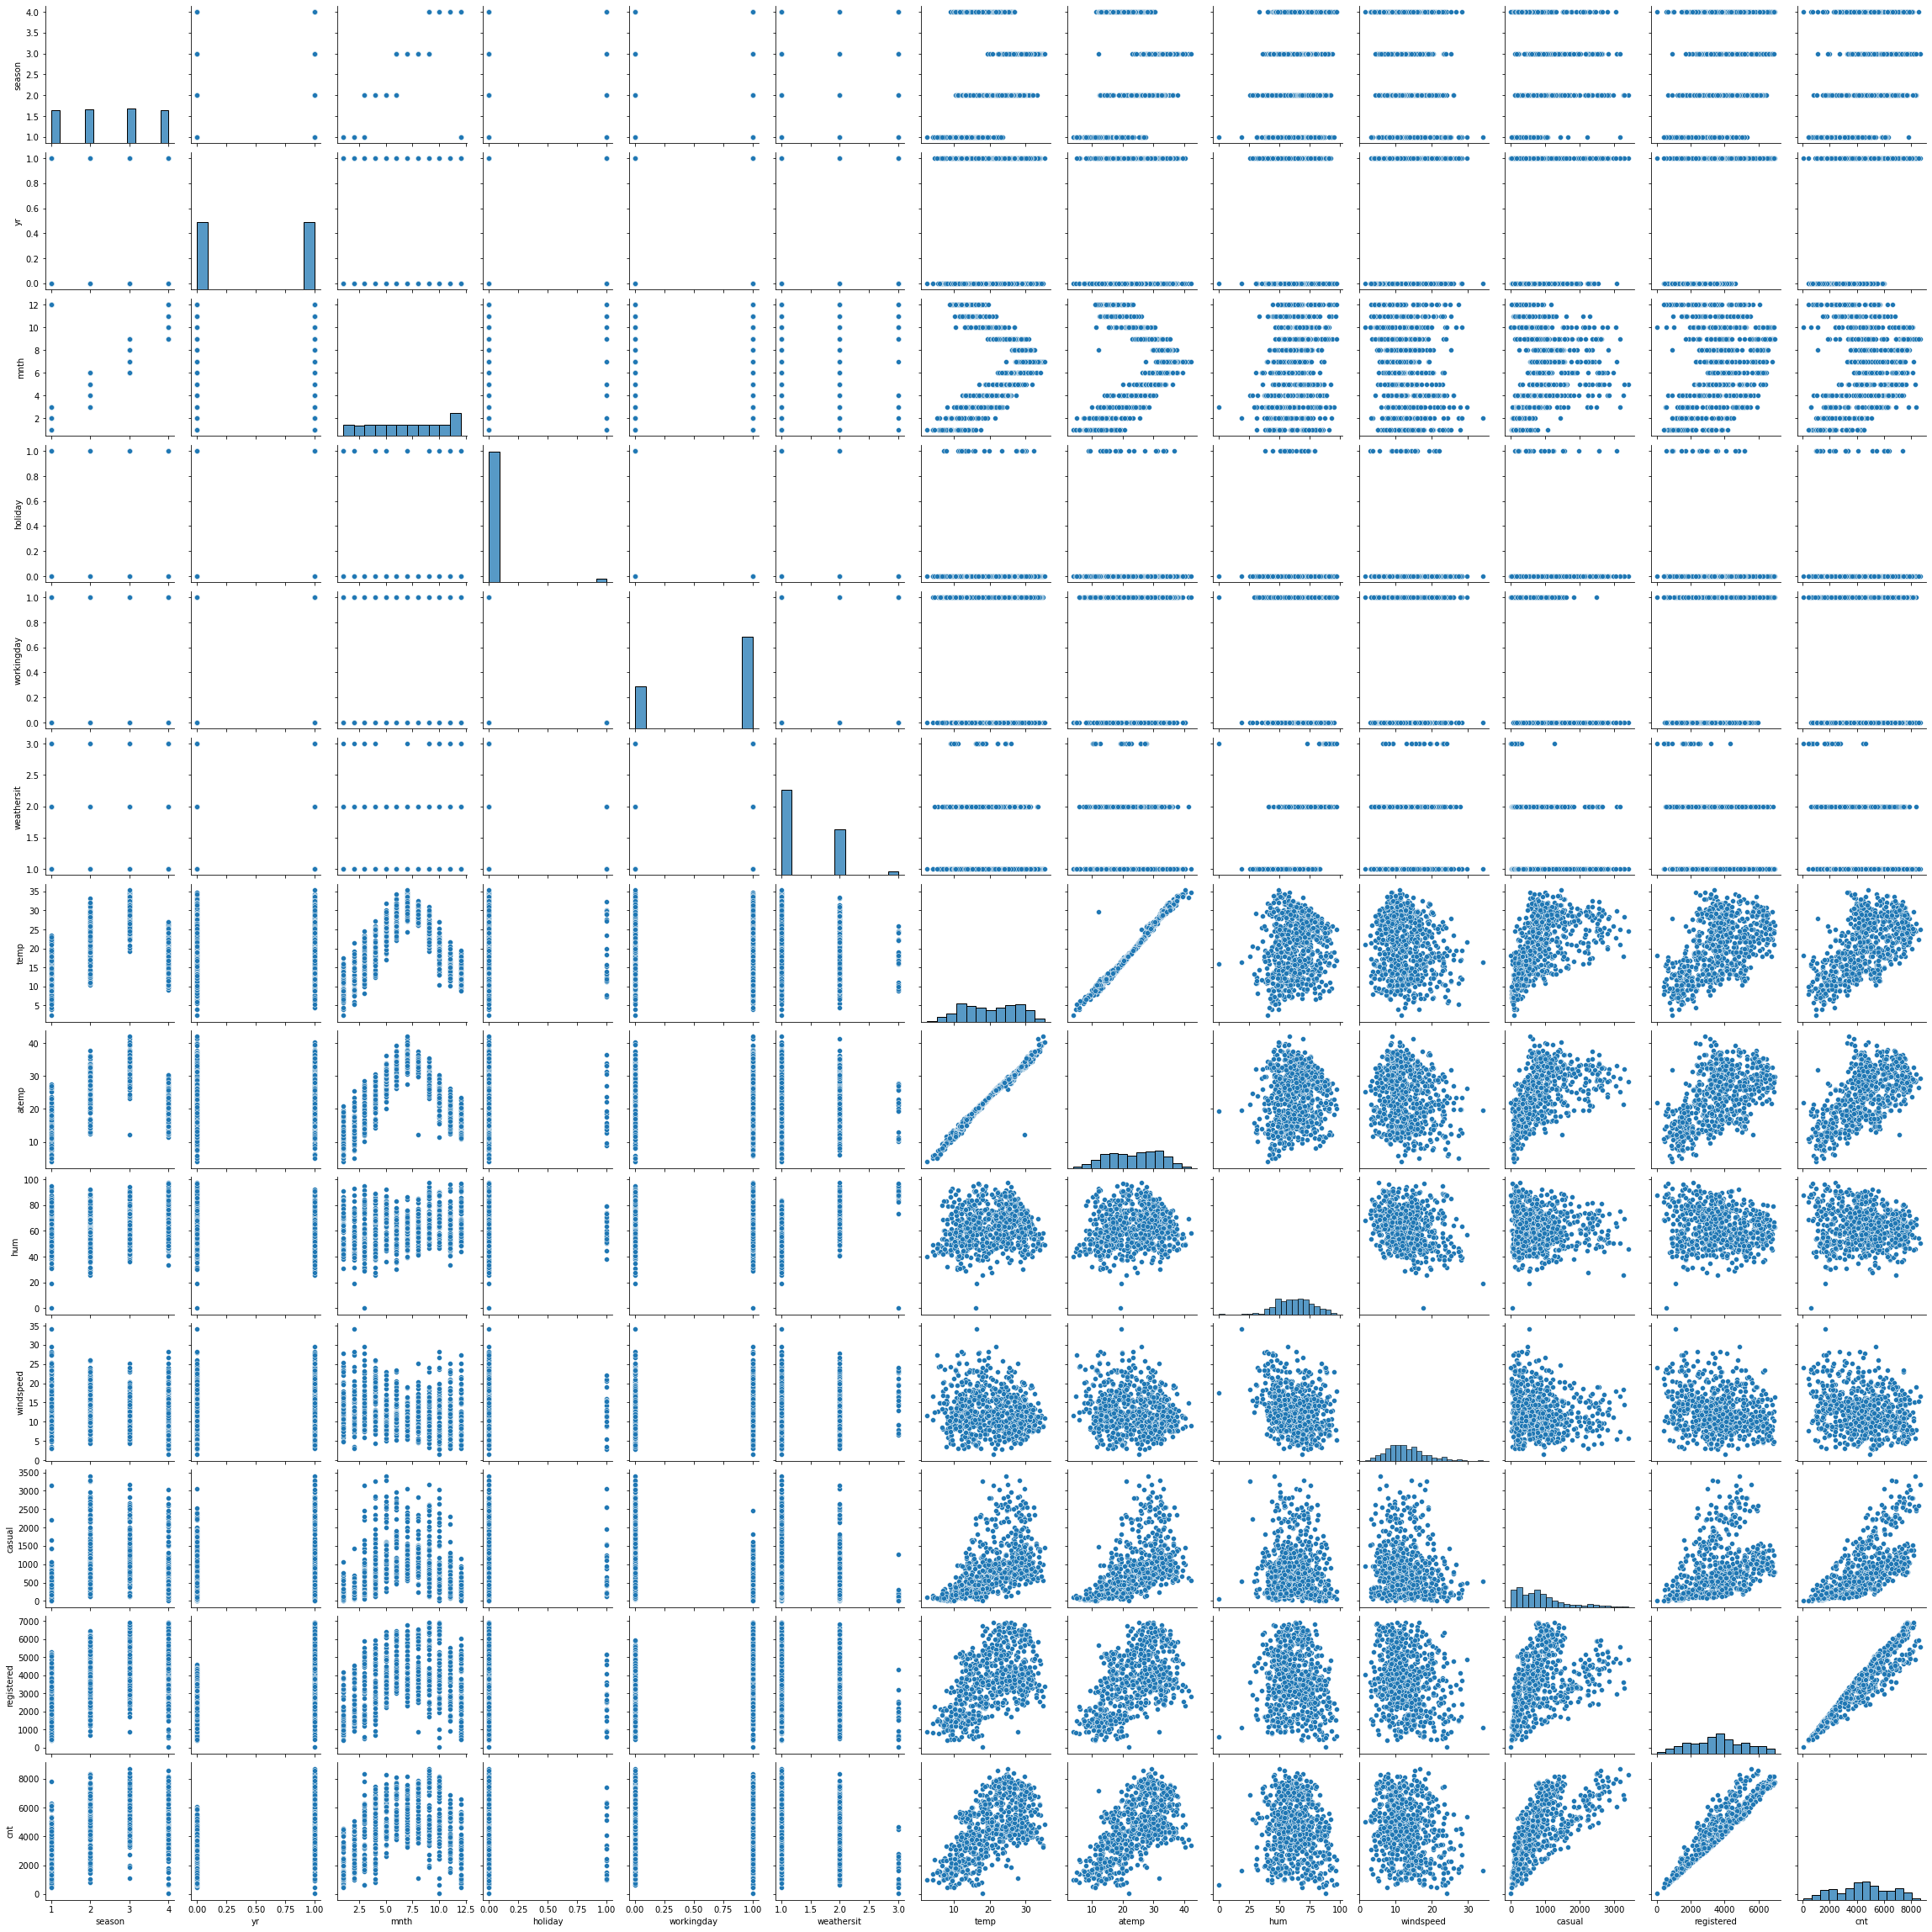

In [9]:
#plotting all the variables against each other
plt.figure(figsize=(45,50))
sns.pairplot(day)

### Observations:
- Observe the patterns of other variables against cnt(Last column)
- season : counts is similar for summer, winter and fall, counts sort of dips for spring
- Yr : There is good increase in counts in 2019 compared to 2018.
- mnth :months also provide similar inference as season, there is dip in number of the months in spring
- holiday : Clearly there is huge increase in numbers during holidays.
- weekday : count looks the smae on all weekdays.
- workingday : sort of give a picture that when in holidays and working days, the count is almost similar, strange!
- weathersit : clearly the count is less on a rainy/snow day
- temp and atemp : both seem to have similar distribution, have linear relationship.
- hum and windspeed : are not linear with count.
- registered : has a good linear relationship with the count.
- casul : have bit of a variance at positive side.

In [10]:
day.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


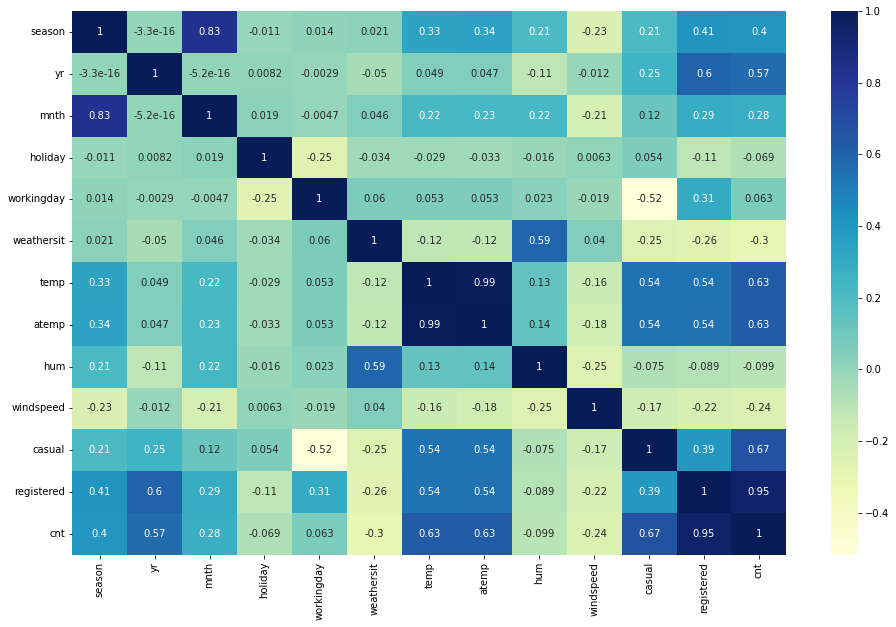

In [11]:
#finding the correlation between the columns
plt.figure(figsize=(16,10))
sns.heatmap(day.corr(),annot = True,cmap='YlGnBu')
plt.show()

### Observations :
Below are some of the columns with high correlation.
- atemp and temp(one of them can be used)
- mnth and season(one of them can be used)
- casual and registered : Since they hold the type of booking, doesnt add any value to the model these columns shall be dropped.


dropping casual, registered, temp and season

In [12]:
day = day.drop(['temp','season','casual','registered'],axis = 1)

In [13]:
day.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt
0,0,1,0,0,2,18.18125,80.5833,10.749882,985
1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349
3,0,1,0,1,1,10.60610,59.0435,10.739832,1562
4,0,1,0,1,1,11.46350,43.6957,12.522300,1600


## Encoding the categorical data

In [14]:
day = pd.get_dummies(day,columns=['mnth','weathersit'],drop_first=True)
day

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,0,0,0,0,0,0,0,0,0,0,1,1,0
726,1,0,1,12.75230,59.0000,10.416557,3095,0,0,0,0,0,0,0,0,0,0,1,1,0
727,1,0,0,12.12000,75.2917,8.333661,1341,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,11.58500,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,1,0,0


## data splitting into train and test set

In [15]:
df_train, df_test = train_test_split(day,train_size=0.7,random_state = 100)

In [16]:
df_train.shape

(510, 20)

In [17]:
df_test.shape

(220, 20)

## Scaling of continuous variables

In [18]:
conti_variables = ['atemp','hum','windspeed','cnt']

In [19]:
scaler = MinMaxScaler()
df_train[conti_variables] = scaler.fit_transform(df_train[conti_variables])

In [20]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#assigning the dependent variable to y_train
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model 

### RFE

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,17)
rfe = rfe.fit(X_train,y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [25]:
X_train_rfe = X_train[col]
X_train = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     139.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.50e-176
Time:                        16:03:45   Log-Likelihood:                 488.47
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     492   BIC:                            -864.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2352      0.029      8.094   

## Calculating the VIF values

In [26]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,atemp,37.19
3,hum,17.96
10,mnth_8,4.56
9,mnth_7,4.55
4,windspeed,3.88
8,mnth_6,3.76
11,mnth_9,3.20
7,mnth_5,3.04
12,mnth_10,2.33
15,weathersit_2,2.18


Removing atemp since the VIF score is high(has correlation with other independent variable)

In [27]:

X_train_rfe = X_train_rfe.drop(['atemp'],axis = 1)
X_train = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     122.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.13e-160
Time:                        16:03:45   Log-Likelihood:                 448.40
No. Observations:                 510   AIC:                            -862.8
Df Residuals:                     493   BIC:                            -790.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2838      0.031      9.197   

In [28]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,hum,11.20
3,windspeed,3.85
14,weathersit_2,2.02
0,yr,1.98
9,mnth_8,1.67
11,mnth_10,1.65
6,mnth_5,1.63
10,mnth_9,1.61
4,mnth_3,1.58
13,mnth_12,1.56


Removing hum since it has high correlation and less significance

In [29]:

X_train_rfe = X_train_rfe.drop(['hum'],axis = 1)
X_train = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.24e-161
Time:                        16:03:45   Log-Likelihood:                 447.37
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     494   BIC:                            -795.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2470      0.017     14.937   

In [30]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,windspeed,3.18
0,yr,1.91
13,weathersit_2,1.50
3,mnth_3,1.37
4,mnth_4,1.35
10,mnth_10,1.26
11,mnth_11,1.26
8,mnth_8,1.24
5,mnth_5,1.23
12,mnth_12,1.20


## Residual Analysis

In [31]:
y_train_pred = lm.predict(X_train)

Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

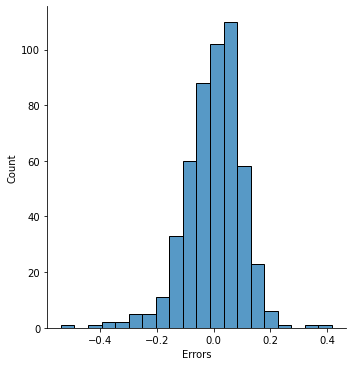

In [32]:
fig = plt.figure()
sns.displot((y_train - y_train_pred),bins = 20)
plt.xlabel('Errors')

## Making Predictions

In [33]:
X_train.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [34]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
conti_variables = ['atemp','hum','windspeed','cnt']
df_test[conti_variables] = scaler.transform(df_test[conti_variables])

In [36]:
df_test = df_test[['yr', 'holiday', 'windspeed', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3','cnt']]
df_test.head()

,yr,holiday,windspeed,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3,cnt
184,0,1,0.084219,0,0,0,0,1,0,0,0,0,0,1,0,0.692706
535,1,0,0.153728,0,0,0,1,0,0,0,0,0,0,0,0,0.712034
299,0,0,0.334206,0,0,0,0,0,0,0,1,0,0,1,0,0.303382
221,0,0,0.339570,0,0,0,0,0,1,0,0,0,0,0,0,0.547400
152,0,0,0.537414,0,0,0,1,0,0,0,0,0,0,0,0,0.569029


In [37]:
df_test.describe()

,yr,holiday,windspeed,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.313293,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273,0.522154
std,0.500809,0.187620,0.159584,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248,0.219163
min,0.000000,0.000000,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,0.000000,0.000000,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378595
50%,0.000000,0.000000,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524678
75%,1.000000,0.000000,0.402718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.677750
max,1.000000,1.000000,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


In [38]:
y_test = df_test.pop('cnt')
x_test = df_test

In [39]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,windspeed,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,1.0,0,1,0.084219,0,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,0.153728,0,0,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,0.334206,0,0,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,0.339570,0,0,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,0.537414,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
Y_test_pred = lm.predict(x_test_sm)

In [41]:
r2_score(y_true=y_test,y_pred=Y_test_pred)

0.7595736635949171

## Conclusion
The R2 value on the test data is close the train data, this gives good confidance on the model.